<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [20]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-02 07:07:12--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  48.3MB/s    in 4.3s    

2025-09-02 07:07:17 (47.2 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [21]:
!pip install pandas
!pip install numpy
!pip install seaborn

In [22]:
!pip install matplotlib

In [23]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Connect to the SQLite database


In [24]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [25]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [26]:
QUERY = "SELECT name as Table_Name FROM sqlite_master WHERE type = 'table'"

pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [27]:
QUERY = "SELECT Age, COUNT(*) as count FROM main GROUP BY Age ORDER BY Age"
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


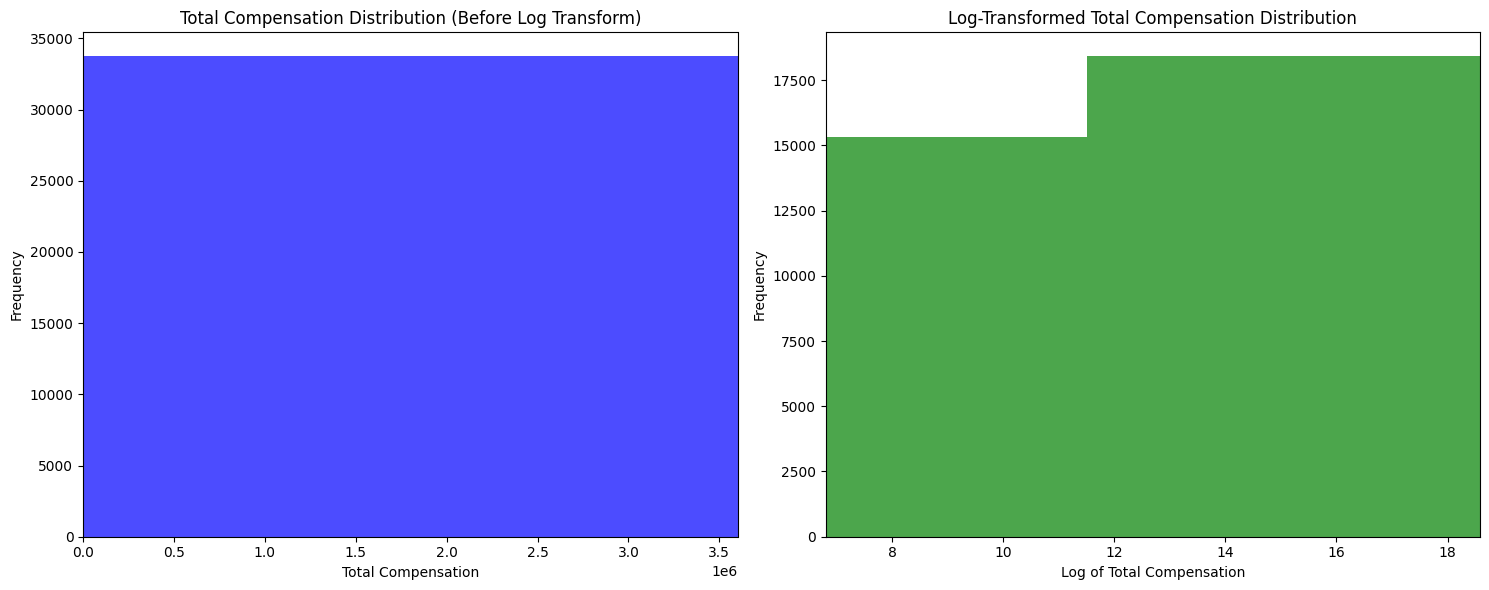

In [28]:
## Write your code here
# Connect and select table
conn = sqlite3.connect('survey-data.sqlite')
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

# Remove NaN values from the 'CompTotal' column
df['CompTotal'] = df['CompTotal'].dropna()

# Log transform the 'CompTotal' column
df['LogCompTotal'] = np.log1p(df['CompTotal'])  # Use log1p to handle zero values

# Create figure and axes for side-by-side histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot original data histogram
ax1.hist(df['CompTotal'], bins=30, color='blue', alpha=0.7)
ax1.set_title('Total Compensation Distribution (Before Log Transform)')
ax1.set_xlabel('Total Compensation')
ax1.set_ylabel('Frequency')

# Set x-axis limits for original data
ax1.set_xlim(0, df['CompTotal'].quantile(0.95))  # Adjust as needed to focus on the main data range

# Plot log-transformed data histogram
ax2.hist(df['LogCompTotal'], bins=30, color='green', alpha=0.7)
ax2.set_title('Log-Transformed Total Compensation Distribution')
ax2.set_xlabel('Log of Total Compensation')
ax2.set_ylabel('Frequency')

# Set x-axis limits for log-transformed data
ax2.set_xlim(df['LogCompTotal'].quantile(0.01), df['LogCompTotal'].quantile(0.99))  # Use ax2 here

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [29]:
conn = sqlite3.connect('survey-data.sqlite')
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

# Check if the DataFrame is defined and the column exists
print(df.columns)  # To see all column names

# Describe the column
print(df['YearsCodePro'].describe(), '\n')

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
count     51610
unique       52
top           2
freq       4168
Name: YearsCodePro, dtype: object 



In [30]:
# Get info about the column (no need for print)
df['YearsCodePro'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 65437 entries, 0 to 65436
Series name: YearsCodePro
Non-Null Count  Dtype 
--------------  ----- 
51610 non-null  object
dtypes: object(1)
memory usage: 511.4+ KB


In [31]:
# Check the data type of the column
print(df['YearsCodePro'].dtypes)

object


In [32]:
df['YearsCodePro'].isnull().sum()

np.int64(13827)

In [33]:
# Convert the 'YearsCodePro' column to numeric, coercing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Check how many NaN values are present after conversion
print(df['YearsCodePro'].isna().sum())  # Should still show 13827 NaNs

# Option 1: Drop rows with NaN values
df = df.dropna(subset=['YearsCodePro'])

# Fill NaN values with the mean (or median) of the column
mean_value = df['YearsCodePro'].median()
df.loc[df['YearsCodePro'].isna(), 'YearsCodePro'] = mean_value

# Now you can check the data type and describe the column again
print(df['YearsCodePro'].dtypes)
print(df['YearsCodePro'].describe())

16733
float64
count    48704.000000
mean        10.739652
std          8.935175
min          1.000000
25%          4.000000
50%          8.000000
75%         15.000000
max         50.000000
Name: YearsCodePro, dtype: float64


In [34]:
# Calculate the bin_edge
count, bin_edges = np.histogram(df['YearsCodePro'])
bin_edges
len(bin_edges)

11

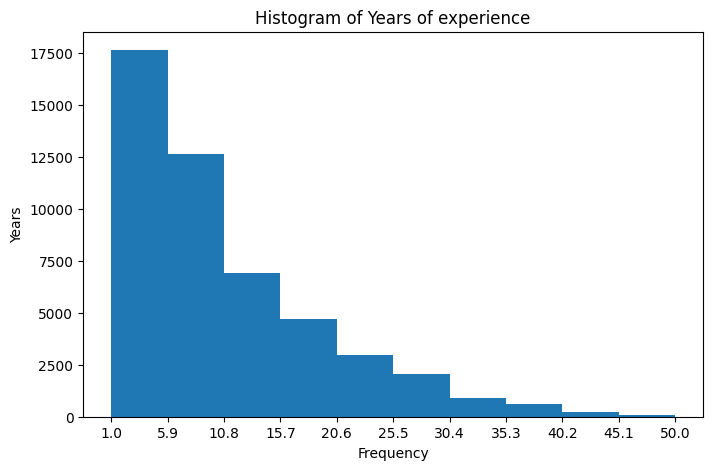

In [35]:
e

plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [36]:
# Let's call out the CompTotal and the Age
Comp_Age = df.loc[:, ['CompTotal', 'Age']]
print(Comp_Age.head())

    CompTotal              Age
1         NaN  35-44 years old
2         NaN  45-54 years old
6         NaN  35-44 years old
9         NaN  35-44 years old
11        NaN  45-54 years old


In [37]:
Comp_Age.isnull().sum()

CompTotal    16051
Age              0
dtype: int64

In [38]:
Comp_Age['CompTotal'].describe()

count    3.265300e+04
mean     3.062506e+48
std      5.533991e+50
min      0.000000e+00
25%      6.000000e+04
50%      1.100000e+05
75%      2.500000e+05
max      1.000000e+53
Name: CompTotal, dtype: float64

In [39]:
Comp_Age.shape

(48704, 2)

In [40]:
# The data is in float type and skewed, so converting into the log10 might help
# Perform log10 transformation with a small constant added
Comp_Age['CompTotal_log10'] = np.log10(Comp_Age['CompTotal'] + 1)

# Display the first few rows to check the transformation
print(Comp_Age[['CompTotal', 'CompTotal_log10']].head())

    CompTotal  CompTotal_log10
1         NaN              NaN
2         NaN              NaN
6         NaN              NaN
9         NaN              NaN
11        NaN              NaN


In [41]:
Comp_Age.isnull().sum()

CompTotal          16051
Age                    0
CompTotal_log10    16051
dtype: int64

In [42]:
Comp_Age.describe()

,CompTotal,CompTotal_log10
count,3.265300e+04,32653.000000
mean,3.062506e+48,5.170612
std,5.533991e+50,0.926398
min,0.000000e+00,0.000000
25%,6.000000e+04,4.778158
50%,1.100000e+05,5.041397
75%,2.500000e+05,5.397942
max,1.000000e+53,53.000000


In [43]:
# The median is very close to the mean and the standard deviation improved after the log 10 transform
# Replace the NaN with the mean
mean_value_log = Comp_Age['CompTotal_log10'].mean()
Comp_Age.loc[Comp_Age['CompTotal_log10'].isna(), 'CompTotal_log10'] = mean_value_log

In [44]:
Comp_Age.head()

,CompTotal,Age,CompTotal_log10
1,NaN,35-44 years old,5.170612
2,NaN,45-54 years old,5.170612
6,NaN,35-44 years old,5.170612
9,NaN,35-44 years old,5.170612
11,NaN,45-54 years old,5.170612


In [45]:
Comp_Age['Age'].value_counts()

Age
25-34 years old       20174
35-44 years old       13036
18-24 years old        7173
45-54 years old        5434
55-64 years old        2130
65 years or older       396
Under 18 years old      247
Prefer not to say       114
Name: count, dtype: int64

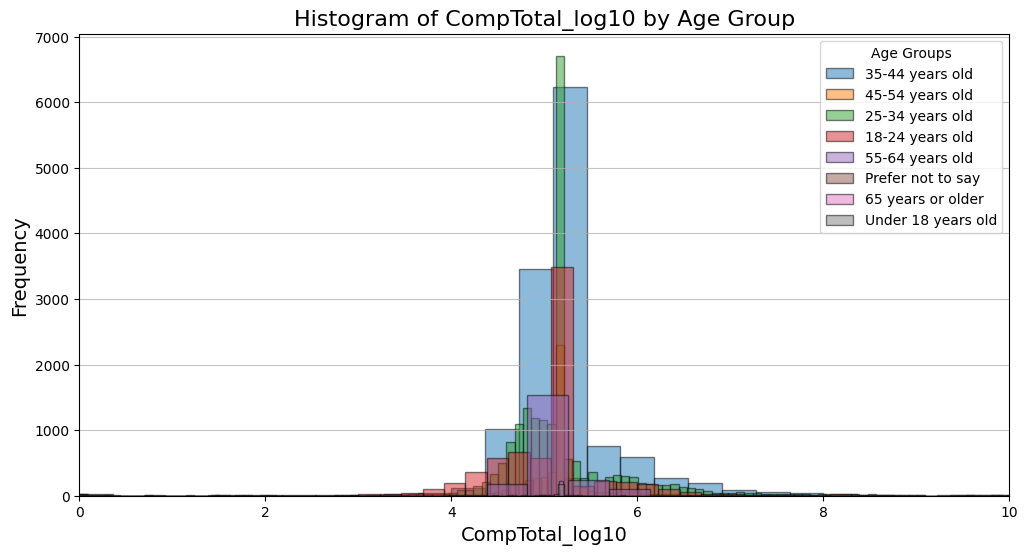

In [46]:
# Create a figure for the histograms
plt.figure(figsize=(12, 6))

# Get unique age groups
unique_ages = Comp_Age['Age'].unique()

# Loop through each age group and plot the histogram
for age in unique_ages:
    plt.hist(Comp_Age['CompTotal_log10'][Comp_Age['Age'] == age], 
             bins=121, alpha=0.5, label=str(age), edgecolor='black')
# Set x-axis limits to focus on the range from 0 to 10
plt.xlim(0, 10)
# Add titles and labels
plt.title('Histogram of CompTotal_log10 by Age Group', fontsize=16)
plt.xlabel('CompTotal_log10', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Age Groups')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [47]:
# Let's call out the CompTotal and the Age
Time_Age = df.loc[:, ['Age', 'TimeSearching']]
print(Time_Age.head())

                Age TimeSearching
1   35-44 years old          None
2   45-54 years old          None
6   35-44 years old          None
9   35-44 years old          None
11  45-54 years old          None


In [48]:
Time_Age.describe()

,Age,TimeSearching
count,48704,27352
unique,8,5
top,25-34 years old,30-60 minutes a day
freq,20174,10396


In [49]:
Time_Age.isnull().sum()

Age                  0
TimeSearching    21352
dtype: int64

In [50]:
Time_Age['TimeSearching'].value_counts()

TimeSearching
30-60 minutes a day           10396
15-30 minutes a day            7507
60-120 minutes a day           4919
Less than 15 minutes a day     2537
Over 120 minutes a day         1993
Name: count, dtype: int64

In [51]:
# Calculate the mode
mode_value = Time_Age['TimeSearching'].mode()[0]

# Replace NaN values with the mode
Time_Age.loc[Time_Age['TimeSearching'].isna(), 'TimeSearching'] = mode_value

In [52]:
# Create a mapping for average time in minutes
time_mapping = {
    '30-60 minutes a day': (30 + 60) / 2,  # Average of 30 and 60
    '15-30 minutes a day': (15 + 30) / 2,  # Average of 15 and 30
    '60-120 minutes a day': (60 + 120) / 2,  # Average of 60 and 120
    'Less than 15 minutes a day': 7.5,  # Average of 0 and 15
    'Over 120 minutes a day': 150,  # Assuming an average of 150 minutes
}

# Apply the mapping to replace TimeSearching with AverageTime
Time_Age['AverageTime'] = Time_Age['TimeSearching'].map(time_mapping)

# Check the updated DataFrame
print(Time_Age.head())

                Age        TimeSearching  AverageTime
1   35-44 years old  30-60 minutes a day         45.0
2   45-54 years old  30-60 minutes a day         45.0
6   35-44 years old  30-60 minutes a day         45.0
9   35-44 years old  30-60 minutes a day         45.0
11  45-54 years old  30-60 minutes a day         45.0


In [53]:
Time_Age_his = Time_Age.loc[:, ['Age', 'AverageTime']]

In [54]:
# Calculate the bin_edge
count, bin_edges = np.histogram(Time_Age_his['AverageTime'])
bin_edges
len(bin_edges)

11

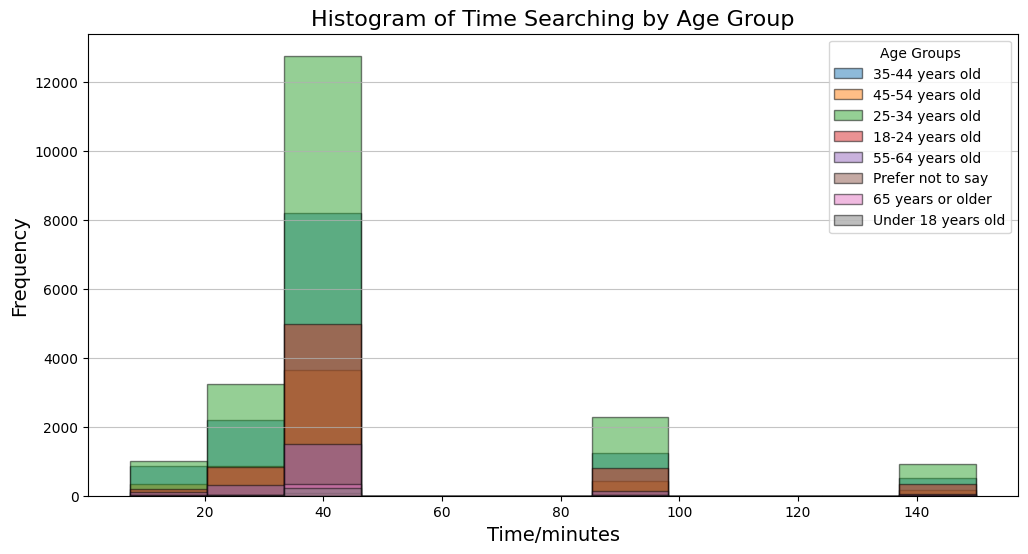

In [71]:
# Create a figure for the histograms
plt.figure(figsize=(12, 6))

# Get unique age groups
unique_ages = Time_Age_his['Age'].unique()

# Loop through each age group and plot the histogram
for age in unique_ages:
    plt.hist(Time_Age_his['AverageTime'][Time_Age_his['Age'] == age], 
             bins=11, alpha=0.5, label=str(age), edgecolor='black')
# Set x-axis limits to focus on the range from 0 to 10
#plt.xlim(0, 10)
# Add titles and labels
plt.title('Histogram of Time Searching by Age Group', fontsize=16)
plt.xlabel('Time/minutes', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Age Groups')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [56]:
## Write your code here
db_fav = df['DatabaseWantToWorkWith'].value_counts()
db_fav_top5 = db_fav.head(5)
print(db_fav_top5)

DatabaseWantToWorkWith
PostgreSQL              3184
Microsoft SQL Server    1300
PostgreSQL;SQLite       1275
SQLite                  1101
MySQL                    784
Name: count, dtype: int64


In [57]:
db_fav_top5.isnull().sum()

np.int64(0)

DatabaseWantToWorkWith
PostgreSQL              3184
Microsoft SQL Server    1300
PostgreSQL;SQLite       1275
SQLite                  1101
MySQL                    784
Name: count, dtype: int64


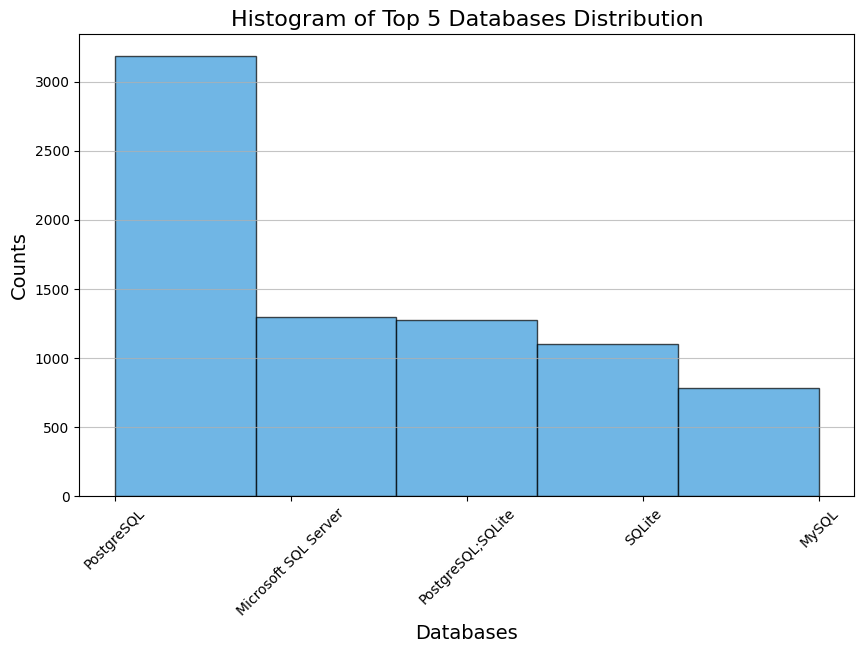

In [58]:
# Count occurrences of each database
db_fav = df['DatabaseWantToWorkWith'].value_counts()
db_fav_top5 = db_fav.head(5)

# Print the top 5 databases
print(db_fav_top5)

# Create an array of categories repeated according to their counts
data = np.repeat(db_fav_top5.index, db_fav_top5.values)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=len(db_fav_top5.index), alpha=0.7, color='#3498DB', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Top 5 Databases Distribution', fontsize=16)
plt.xlabel('Databases', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

**Comments:** 
- It is technically a bar chart, and I do not know why the question asked for the histogram. 

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [59]:
#Connect to database
conn = sqlite3.connect('survey-data.sqlite')
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

# Count occurrences of each work type
remote_work= df['RemoteWork'].value_counts()
print(remote_work)

RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


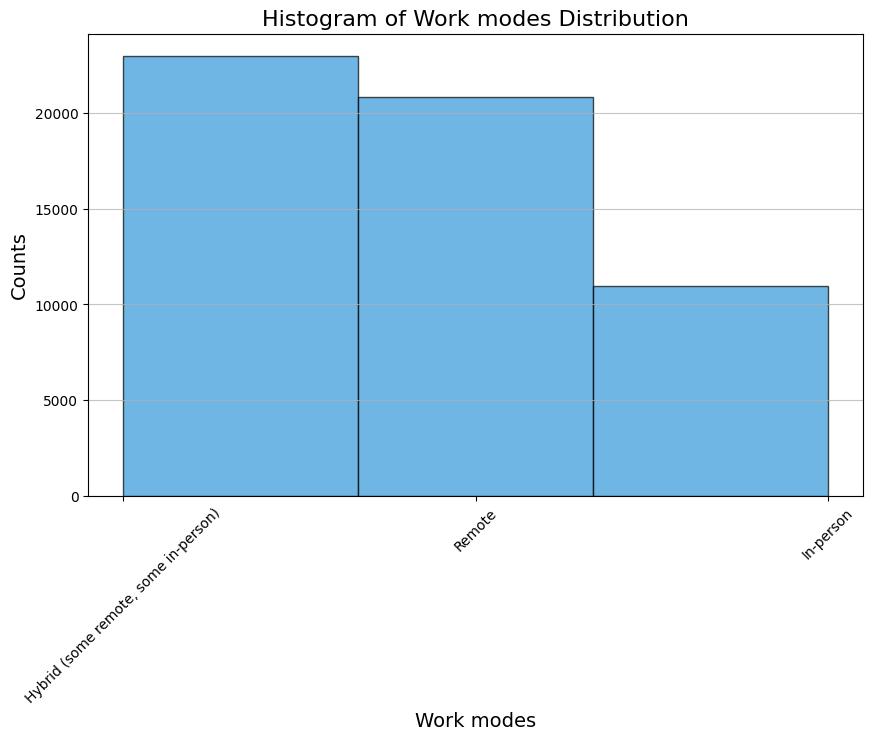

In [60]:
# Create an array of categories repeated according to their counts
data = np.repeat(remote_work.index, remote_work.values)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=len(remote_work.index), alpha=0.7, color='#3498DB', edgecolor='black')

# Add titles and labels
plt.title('Histogram of Work modes Distribution', fontsize=16)
plt.xlabel('Work modes', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


In [61]:
Comp_Age.head(20)

,CompTotal,Age,CompTotal_log10
1,NaN,35-44 years old,5.170612
2,NaN,45-54 years old,5.170612
6,NaN,35-44 years old,5.170612
9,NaN,35-44 years old,5.170612
11,NaN,45-54 years old,5.170612
12,NaN,35-44 years old,5.170612
14,NaN,25-34 years old,5.170612
15,NaN,45-54 years old,5.170612
17,NaN,18-24 years old,5.170612
18,NaN,25-34 years old,5.170612


In [63]:
# Transform the values in Age into numerical
# Define a function to convert age categories to numerical values
def convert_age_to_numeric(age):
    if age == 'Under 18 years old':
        return 17
    elif age == '18-24 years old':
        return (18 + 24) / 2
    elif age == '25-34 years old':
        return (25 + 34) / 2
    elif age == '35-44 years old':
        return (35 + 44) / 2
    elif age == '45-54 years old':
        return (45 + 54) / 2
    elif age == '55-64 years old':
        return (55 + 64) / 2
    elif age == '65 years or older':
        return 70
    elif age == "Prefer not to say":
        return 29.5
    else:
        return None

# Apply the function to the Age column to create Age_numeric
Comp_Age['Age_numerical'] = Comp_Age['Age'].apply(convert_age_to_numeric)
print(Comp_Age['Age_numerical'].dtypes)

float64


In [64]:
Comp_Age.head(20)

,CompTotal,Age,CompTotal_log10,Age_numerical
1,NaN,35-44 years old,5.170612,39.5
2,NaN,45-54 years old,5.170612,49.5
6,NaN,35-44 years old,5.170612,39.5
9,NaN,35-44 years old,5.170612,39.5
11,NaN,45-54 years old,5.170612,49.5
12,NaN,35-44 years old,5.170612,39.5
14,NaN,25-34 years old,5.170612,29.5
15,NaN,45-54 years old,5.170612,49.5
17,NaN,18-24 years old,5.170612,21.0
18,NaN,25-34 years old,5.170612,29.5


In [65]:
Comp_Age.head(20).isnull().sum()

CompTotal          20
Age                 0
CompTotal_log10     0
Age_numerical       0
dtype: int64

In [66]:
# Filter the DataFrame for ages between 45 and 60
filtered_data = Comp_Age[(Comp_Age['Age_numerical'] >= 45) & (Comp_Age['Age_numerical'] <= 60)]

# Display the filtered DataFrame
print(filtered_data.head())

    CompTotal              Age  CompTotal_log10  Age_numerical
2         NaN  45-54 years old         5.170612           49.5
11        NaN  45-54 years old         5.170612           49.5
15        NaN  45-54 years old         5.170612           49.5
22        NaN  45-54 years old         5.170612           49.5
23        NaN  55-64 years old         5.170612           59.5


In [74]:
# Count the bin_edges
count, bin_edges = np.histogram(filtered_data['CompTotal_log10'])
bin_edges
len(bin_edges)

11

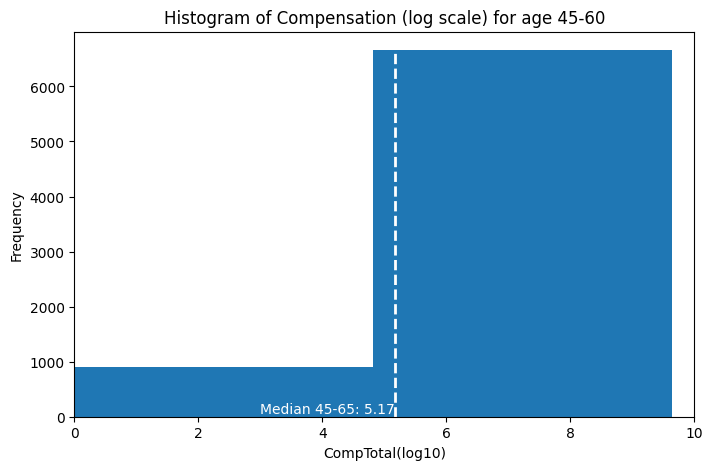

In [83]:
# Calculate the median for the entire age range from 45 to 65
median_45_65 = filtered_data[filtered_data['Age_numerical'].between(45, 65)]['CompTotal_log10'].median()

# Plotting the histogram
filtered_data['CompTotal_log10'].plot(kind='hist', figsize=(8, 5), bins=11)
plt.xlim(0, 10)
plt.title('Histogram of Compensation (log scale) for age 45-60')
plt.ylabel('Frequency')
plt.xlabel('CompTotal(log10)')

# Annotate the median for the age range 45-65
plt.axvline(median_45_65, color='White', linestyle='dashed', linewidth=2)
plt.text(median_45_65, 0, f'Median 45-65: {median_45_65:.2f}', color='white', ha='right', va='bottom')

plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [92]:
## Write your code here
# Connect and select table
conn = sqlite3.connect('survey-data.sqlite')
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)
Sat_Exp = df.loc[:, ['JobSat', 'YearsCodePro']]
print(Sat_Exp.head())

   JobSat YearsCodePro
0     NaN         None
1     NaN           17
2     NaN           27
3     NaN         None
4     NaN         None


In [93]:
Sat_Exp.dtypes

JobSat          float64
YearsCodePro     object
dtype: object

In [94]:
Sat_Exp.isnull().sum()

JobSat          36311
YearsCodePro    13827
dtype: int64

In [96]:
# Drop rows with NaN values
Sat_Exp = Sat_Exp.dropna(subset=['YearsCodePro'])
Sat_Exp.isnull().sum()

JobSat          23254
YearsCodePro        0
dtype: int64

In [97]:
Sat_Exp['JobSat'].value_counts()

JobSat
8.0     7325
7.0     6243
6.0     3651
9.0     3557
10.0    2196
5.0     1869
3.0     1141
4.0     1097
2.0      736
0.0      284
1.0      257
Name: count, dtype: int64

In [98]:
Sat_Exp['JobSat'].describe()

count    28356.000000
mean         6.949676
std          2.074857
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: JobSat, dtype: float64

In [100]:
Sat_Exp.isnull().sum()

JobSat          23254
YearsCodePro        0
dtype: int64

In [101]:
# Calculate the mode of JobSat
median_jobsat = Sat_Exp['JobSat'].mode()[0]  # Select the first mode if there are multiple

# Fill NaN values in JobSat with the mode
Sat_Exp['JobSat'].fillna(median_jobsat, inplace=True)

# Check if there are still missing values
missing_values = Sat_Exp['JobSat'].isna().sum()
print(f'Missing values in JobSat after filling: {missing_values}')

Missing values in JobSat after filling: 0


In [102]:
Sat_Exp['JobSat'].describe()

count    51610.000000
mean         7.422922
std          1.624307
min          0.000000
25%          7.000000
50%          8.000000
75%          8.000000
max         10.000000
Name: JobSat, dtype: float64

In [103]:
Sat_Exp['JobSat'].value_counts()

JobSat
8.0     30579
7.0      6243
6.0      3651
9.0      3557
10.0     2196
5.0      1869
3.0      1141
4.0      1097
2.0       736
0.0       284
1.0       257
Name: count, dtype: int64

In [106]:
Sat_Exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51610 entries, 1 to 65435
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobSat        51610 non-null  float64
 1   YearsCodePro  51610 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.2+ MB


In [107]:
Sat_Exp['YearsCodePro'].value_counts

<bound method IndexOpsMixin.value_counts of 1        17
2        27
6         7
9        11
11       25
         ..
65428     7
65431    24
65432     3
65434     5
65435     2
Name: YearsCodePro, Length: 51610, dtype: object>

In [109]:
# Convert YearsCodePro to numeric, forcing errors to NaN
Sat_Exp['YearsCodePro'] = pd.to_numeric(Sat_Exp['YearsCodePro'], errors='coerce')

# Plotting the histogram for JobSat against YearsCodePro
plt.figure(figsize=(12, 6))

plt.hist(Sat_Exp['YearsCodePro'], Sat_Exp['JobSat'], bins=[30, 10], cmap='Blues')

plt.title('Histogram of Job Satisfaction Scores by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.colorbar(label='Frequency')
plt.show()


TypeError: hist() got multiple values for argument 'bins'

<Figure size 1200x600 with 0 Axes>

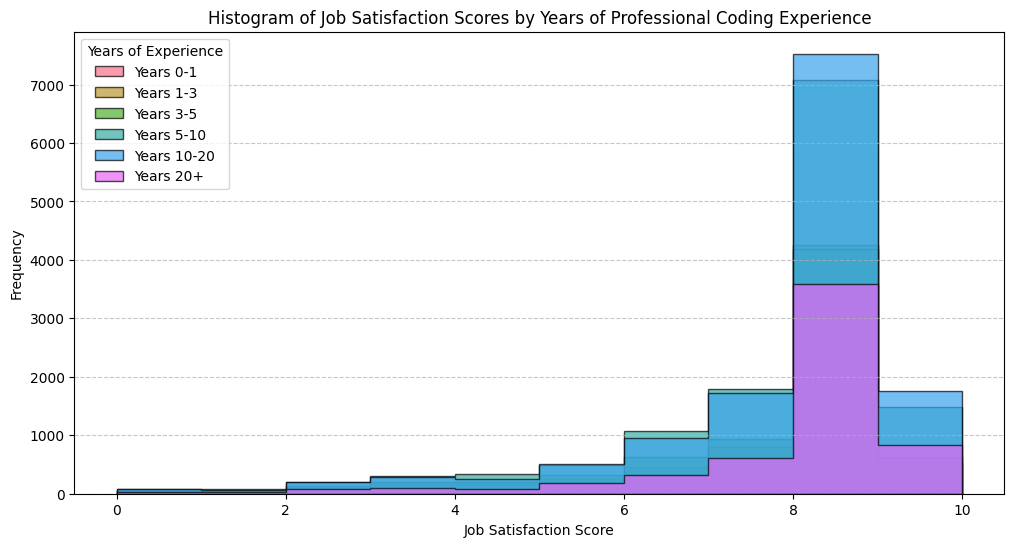

In [111]:
# Convert YearsCodePro to numeric, forcing errors to NaN
Sat_Exp['YearsCodePro'] = pd.to_numeric(Sat_Exp['YearsCodePro'], errors='coerce')

# Create bins for YearsCodePro
bins = [0, 1, 3, 5, 10, 20, 30]
labels = ['0-1', '1-3', '3-5', '5-10', '10-20', '20+']

# Create a new column for the binned YearsCodePro
Sat_Exp['YearsCodePro_binned'] = pd.cut(Sat_Exp['YearsCodePro'], bins=bins, labels=labels, right=False)

# Set the color palette
colors = sns.color_palette("husl", len(labels))  # You can choose other palettes as well

# Plotting the histogram for JobSat based on YearsCodePro bins
plt.figure(figsize=(12, 6))

# Create a histogram for each bin
for i, label in enumerate(labels):
    subset = Sat_Exp[Sat_Exp['YearsCodePro_binned'] == label]
    plt.hist(subset['JobSat'], bins=10, alpha=0.7, label=f'Years {label}', color=colors[i], edgecolor='black', histtype='stepfilled')

plt.title('Histogram of Job Satisfaction Scores by Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Frequency')
plt.legend(title='Years of Experience')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
